##Goal :

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.



###Business Goal :

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

##Step 1: Reading and Understanding the Data


In [0]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_colwidth', -1)
     


To understand the column definition , Please refer to the data dictionary - https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt

In [0]:
df = pd.read_csv('/Workspace/Users/pradeep.ravi@databricks.com/ml/adv_reg/assignment/train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
df.shape

Out[86]: (1460, 81)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From the above info, we can observe the below things,
- Total number of instances are 1460 with 81 columns 
- SalePrice is the target variable 
- Huge amount of missing values are observed in few of the column

##Step 2: Outlier and Missing values treatment


In [0]:
df.isna().sum()

Out[88]: Id               0   
MSSubClass       0   
MSZoning         0   
LotFrontage      259 
LotArea          0   
Street           0   
Alley            1369
LotShape         0   
LandContour      0   
Utilities        0   
LotConfig        0   
LandSlope        0   
Neighborhood     0   
Condition1       0   
Condition2       0   
BldgType         0   
HouseStyle       0   
OverallQual      0   
OverallCond      0   
YearBuilt        0   
YearRemodAdd     0   
RoofStyle        0   
RoofMatl         0   
Exterior1st      0   
Exterior2nd      0   
MasVnrType       8   
MasVnrArea       8   
ExterQual        0   
ExterCond        0   
Foundation       0   
BsmtQual         37  
BsmtCond         37  
BsmtExposure     38  
BsmtFinType1     37  
BsmtFinSF1       0   
BsmtFinType2     38  
BsmtFinSF2       0   
BsmtUnfSF        0   
TotalBsmtSF      0   
Heating          0   
HeatingQC        0   
CentralAir       0   
Electrical       1   
1stFlrSF         0   
2ndFlrSF         0   
L

For a wider dataset where we have more columns, manually inspecting and removing the columns with more missing values is unrealistic, the programatic approch is to set the tolreance and remove the missing values based on the tolerance. For example ,Lets say 30% is the tolreance used for this dataset which means the column has 70% null values , the column with 70 % null values will be removed and considered as invalid feature

In [0]:
def removecols_missingvalues(df,tolerance=0.3):
    """
    The function takes Dataframe as input
    Based the given tolreance of missing values in the given column , the columns are removed
    Default tolerance is 30% which means columns which has 70% missing values will be dropped
    returns new dataframe with dropped columns
    """
    l = len(df)
    dropcols = []
    df2 = df[[column for column in df if df[column].count() / l >= tolerance]]
    
    print("List of dropped columns:", end=" ")
    for c in df.columns:
        if c not in df2.columns:
            dropcols.append(c)
            print(f"column {c} is discarded because it has only {((df[c].count())/l)*100} % valid values!")
    print('\n')
    
    df = df2
    return df

df = removecols_missingvalues(df)

List of dropped columns: column Alley is discarded because it has only 6.232876712328768 % valid values!
column PoolQC is discarded because it has only 0.4794520547945206 % valid values!
column Fence is discarded because it has only 19.246575342465754 % valid values!
column MiscFeature is discarded because it has only 3.6986301369863015 % valid values!




The above missing data handling approach resulted in dropping four features 
- Alley
- PoolQC
- Fence
- MiscFeature

In [0]:
df.shape

Out[90]: (1460, 77)

In [0]:
df.dtypes

Out[91]: Id               int64  
MSSubClass       int64  
MSZoning         object 
LotFrontage      float64
LotArea          int64  
Street           object 
LotShape         object 
LandContour      object 
Utilities        object 
LotConfig        object 
LandSlope        object 
Neighborhood     object 
Condition1       object 
Condition2       object 
BldgType         object 
HouseStyle       object 
OverallQual      int64  
OverallCond      int64  
YearBuilt        int64  
YearRemodAdd     int64  
RoofStyle        object 
RoofMatl         object 
Exterior1st      object 
Exterior2nd      object 
MasVnrType       object 
MasVnrArea       float64
ExterQual        object 
ExterCond        object 
Foundation       object 
BsmtQual         object 
BsmtCond         object 
BsmtExposure     object 
BsmtFinType1     object 
BsmtFinSF1       int64  
BsmtFinType2     object 
BsmtFinSF2       int64  
BsmtUnfSF        int64  
TotalBsmtSF      int64  
Heating          object 
HeatingQC       

In [0]:
df.nunique()

Out[92]: Id               1460
MSSubClass       15  
MSZoning         5   
LotFrontage      110 
LotArea          1073
Street           2   
LotShape         4   
LandContour      4   
Utilities        2   
LotConfig        5   
LandSlope        3   
Neighborhood     25  
Condition1       9   
Condition2       8   
BldgType         5   
HouseStyle       8   
OverallQual      10  
OverallCond      9   
YearBuilt        112 
YearRemodAdd     61  
RoofStyle        6   
RoofMatl         8   
Exterior1st      15  
Exterior2nd      16  
MasVnrType       4   
MasVnrArea       327 
ExterQual        4   
ExterCond        5   
Foundation       6   
BsmtQual         4   
BsmtCond         4   
BsmtExposure     4   
BsmtFinType1     6   
BsmtFinSF1       637 
BsmtFinType2     6   
BsmtFinSF2       144 
BsmtUnfSF        780 
TotalBsmtSF      721 
Heating          6   
HeatingQC        5   
CentralAir       2   
Electrical       5   
1stFlrSF         753 
2ndFlrSF         417 
LowQualFinSF     24  
G

**Its clearly evident there is no column have single value to drop** 

In [0]:
df=df.drop_duplicates()

In [0]:
df.shape

Out[94]: (1460, 77)

**There is no duplicates in the data**

In [0]:
df.isna().sum()

Out[95]: Id               0  
MSSubClass       0  
MSZoning         0  
LotFrontage      259
LotArea          0  
Street           0  
LotShape         0  
LandContour      0  
Utilities        0  
LotConfig        0  
LandSlope        0  
Neighborhood     0  
Condition1       0  
Condition2       0  
BldgType         0  
HouseStyle       0  
OverallQual      0  
OverallCond      0  
YearBuilt        0  
YearRemodAdd     0  
RoofStyle        0  
RoofMatl         0  
Exterior1st      0  
Exterior2nd      0  
MasVnrType       8  
MasVnrArea       8  
ExterQual        0  
ExterCond        0  
Foundation       0  
BsmtQual         37 
BsmtCond         37 
BsmtExposure     38 
BsmtFinType1     37 
BsmtFinSF1       0  
BsmtFinType2     38 
BsmtFinSF2       0  
BsmtUnfSF        0  
TotalBsmtSF      0  
Heating          0  
HeatingQC        0  
CentralAir       0  
Electrical       1  
1stFlrSF         0  
2ndFlrSF         0  
LowQualFinSF     0  
GrLivArea        0  
BsmtFullBath     0  
Bsmt

##Step 3 Univariate and Bi-Variate Analysis 

In [0]:
df_numerical_features = df.select_dtypes(include='number')
df_categorical_features = df.select_dtypes(include='object')
df_numerical_features.head(4)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000


In [0]:
df_categorical_features.head(4)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml


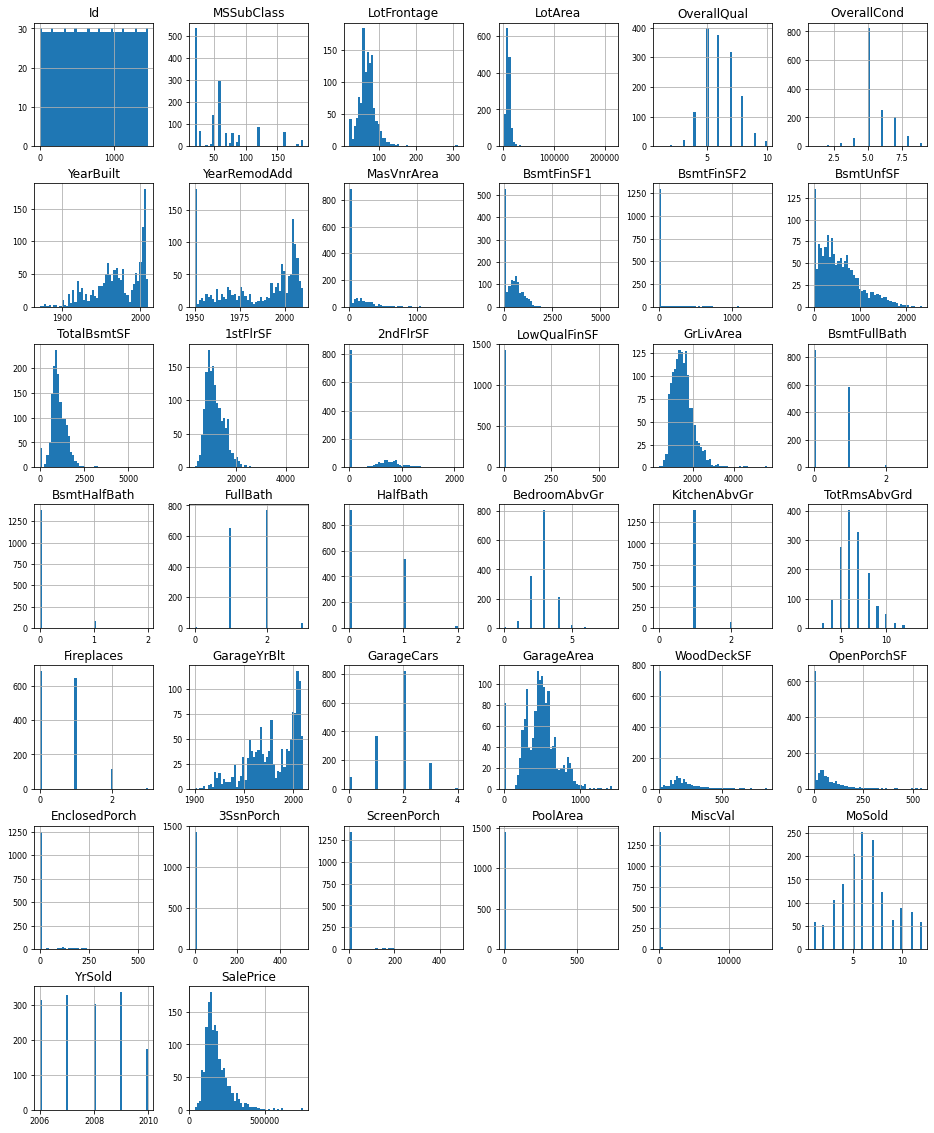

In [0]:
df_numerical_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 


The above chart explains the values are skewed within their categories , some of the columns where we see skewed values are

- PoolArea
- 3ssnPorch
- EnclosedPorch
- ScreenPorch
- MiscVal
- KitchenAbvGr
- BsmtHalfBath
- LowQualFinSF
- BsmtFinSF2

In [0]:
num_skewed_features=['PoolArea','3SsnPorch','EnclosedPorch','ScreenPorch','MiscVal','KitchenAbvGr','BsmtHalfBath','LowQualFinSF','BsmtFinSF2']
df[num_skewed_features].describe()

,PoolArea,3SsnPorch,EnclosedPorch,ScreenPorch,MiscVal,KitchenAbvGr,BsmtHalfBath,LowQualFinSF,BsmtFinSF2
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.758904,3.409589,21.954110,15.060959,43.489041,1.046575,0.057534,5.844521,46.549315
std,40.177307,29.317331,61.119149,55.757415,496.123024,0.220338,0.238753,48.623081,161.319273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,738.000000,508.000000,552.000000,480.000000,15500.000000,3.000000,2.000000,572.000000,1474.000000


In [0]:
for i in num_skewed_features:
    print(df[i].value_counts())

0      1453
512    1   
648    1   
576    1   
555    1   
480    1   
519    1   
738    1   
Name: PoolArea, dtype: int64
0      1436
168    3   
144    2   
180    2   
216    2   
290    1   
153    1   
96     1   
23     1   
162    1   
182    1   
196    1   
320    1   
245    1   
238    1   
508    1   
140    1   
130    1   
407    1   
304    1   
Name: 3SsnPorch, dtype: int64
0      1252
112    15  
96     6   
192    5   
144    5   
120    5   
216    5   
156    4   
116    4   
252    4   
184    3   
126    3   
150    3   
164    3   
128    3   
102    3   
176    3   
228    3   
40     3   
80     2   
236    2   
34     2   
160    2   
32     2   
84     2   
115    2   
158    2   
137    2   
240    2   
100    2   
154    2   
185    2   
264    2   
190    2   
168    2   
108    2   
36     2   
202    2   
234    2   
77     2   
244    2   
180    2   
224    2   
205    2   
39     2   
114    2   
268    1   
19     1   
174    1   
226    1   
138  

**The above variables are imbalanced , we can drop them because while we split and validate , these data can cause bias in the model output because of the heavy skewness**

In [0]:
df=df.drop(num_skewed_features,axis=1)
df.shape

Out[101]: (1460, 68)

In [0]:
df_numerical_features=df_numerical_features.drop(num_skewed_features,axis=1)

In [0]:
df_numerical_features.head(4)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2003.0,2,548,0,61,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,1976.0,2,460,298,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,3,6,1,2001.0,2,608,0,42,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,540,756,961,756,1717,1,1,0,3,7,1,1998.0,3,642,0,35,2,2006,140000


In [0]:
def outlier_calc(df):
    
    """Takes numerical Dataframe as input and applies IQR to calculate the outlier percentage

    Returns:
        Dataframe with column names and respective outlier percentage & dict version of the same
    """
    
    outlierpercent={}

    for feature in df.columns:
        IQR=df[feature].quantile(.75)-df[feature].quantile(.25)
        outliers_count=df[(df[feature]>(df[feature].quantile(.75)+1.5*IQR)) | (df[feature]<(df[feature].quantile(.25)-1.5*IQR))].shape[0]
        outlierpercent[feature]=round(outliers_count/df.shape[0]*100,2)
        
    outlier_df=pd.DataFrame({'Features':list(outlierpercent.keys()),'Percentage':list(outlierpercent.values())})
    outlier_df=outlier_df[outlier_df.Percentage > 0 ]
    return (outlier_df.sort_values(by="Percentage", ascending=False),outlierpercent)

df_num_outliers,outlierpercent=outlier_calc(df_numerical_features)
df_num_outliers

,Features,Percentage
5,OverallCond,8.56
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
25,OpenPorchSF,5.27
3,LotArea,4.73
11,TotalBsmtSF,4.18
28,SalePrice,4.18
18,BedroomAbvGr,2.40
24,WoodDeckSF,2.19


In [0]:
df_num_outliers.Features

Out[105]: 5     OverallCond 
1     MSSubClass  
8     MasVnrArea  
2     LotFrontage 
25    OpenPorchSF 
3     LotArea     
11    TotalBsmtSF 
28    SalePrice   
18    BedroomAbvGr
24    WoodDeckSF  
14    GrLivArea   
19    TotRmsAbvGrd
10    BsmtUnfSF   
23    GarageArea  
12    1stFlrSF    
9     BsmtFinSF1  
6     YearBuilt   
20    Fireplaces  
22    GarageCars  
4     OverallQual 
13    2ndFlrSF    
15    BsmtFullBath
Name: Features, dtype: object

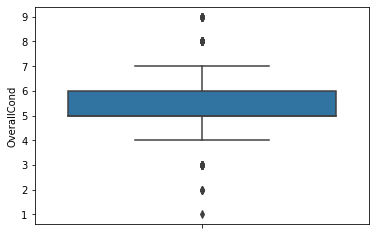

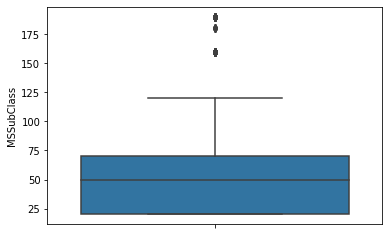

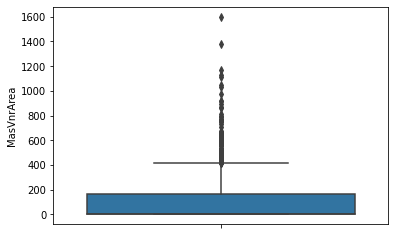

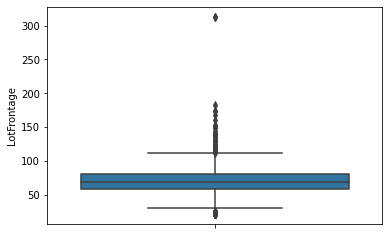

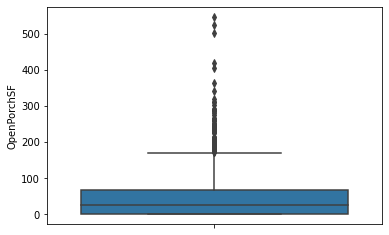

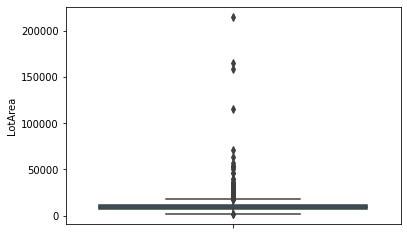

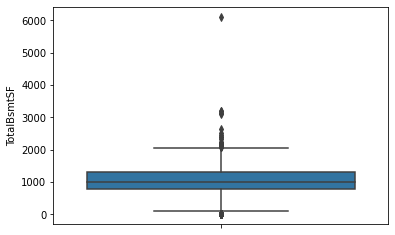

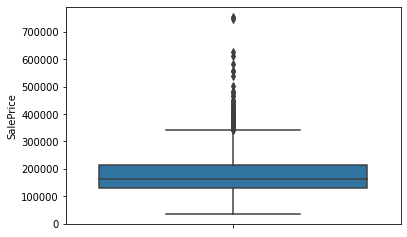

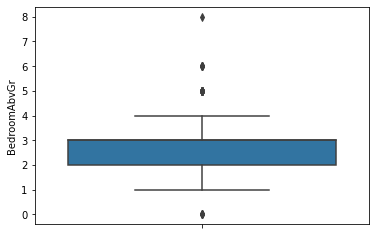

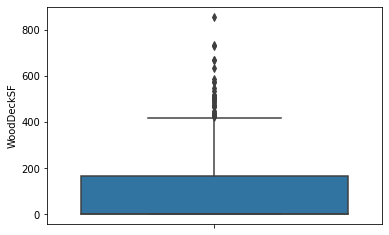

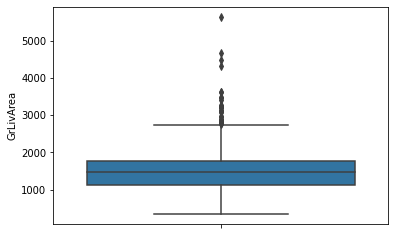

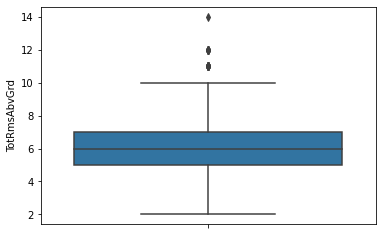

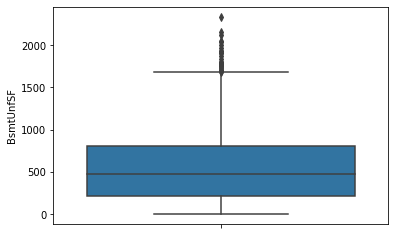

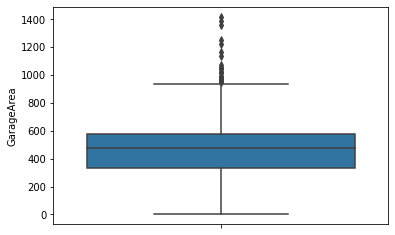

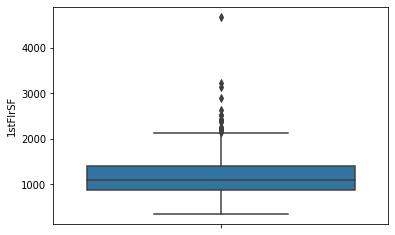

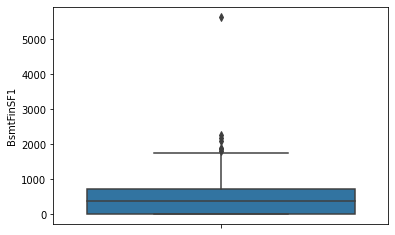

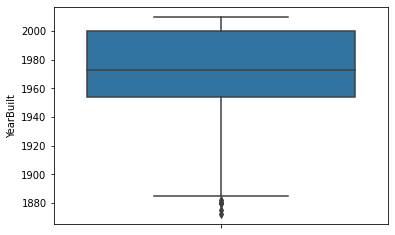

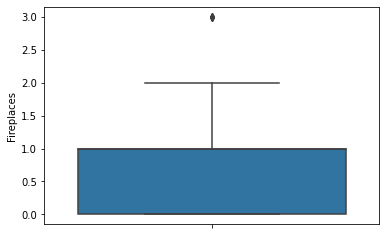

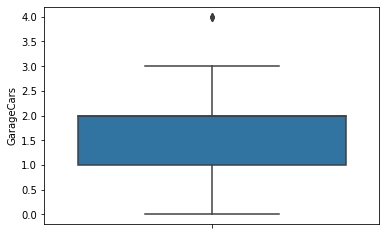

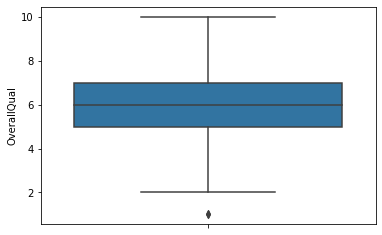

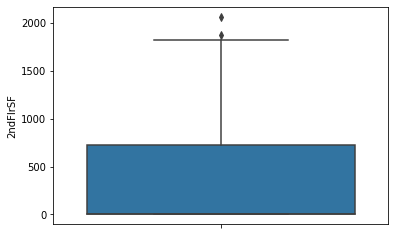

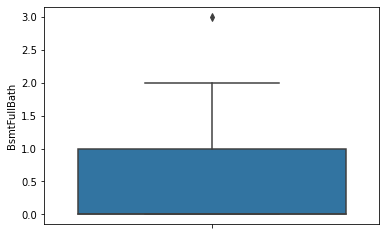

In [0]:
for col in df_num_outliers.Features:
    sns.boxplot(y=df[col])
    plt.show()



**The outlier treatment is performed by capping the IQR min/max values for the respective features instead of dropping, this treatment is performed to all the numerical columns which had outliers and the target column "SalesPrice" is excluded** 

In [0]:

for feature, percentage in outlierpercent.items():
    if feature != 'SalePrice': #Target column is excluded 
        IQR = df[feature].quantile(.75) - df[feature].quantile(.25) 
        max_value = df[feature].quantile(.75)+1.5*IQR
        min_value = df[feature].quantile(.25)-1.5*IQR
        df[feature][df[feature] > max_value] = max_value
        df[feature][df[feature] < min_value ] = min_value


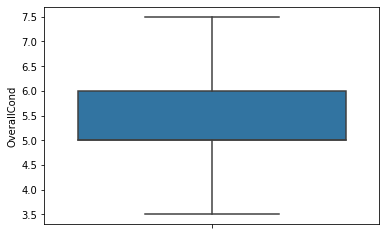

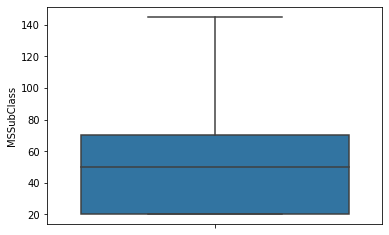

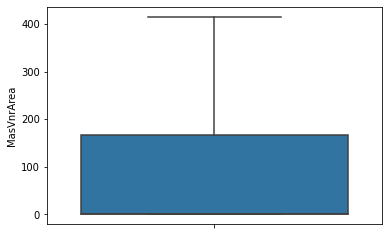

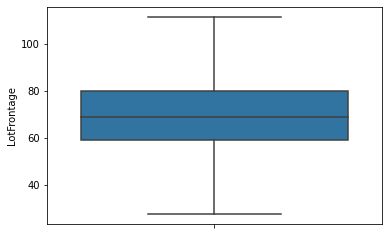

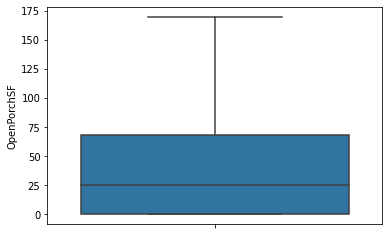

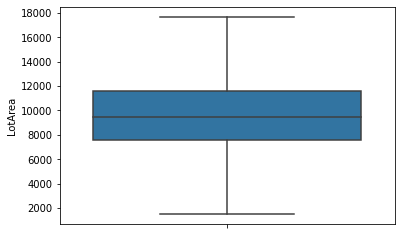

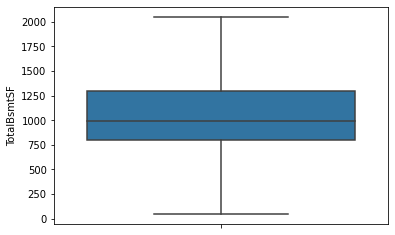

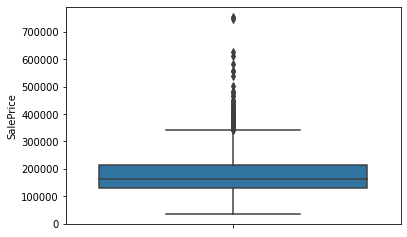

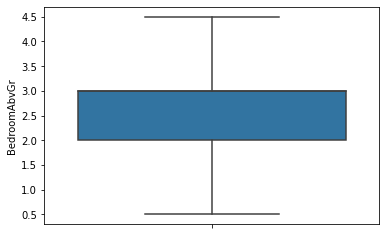

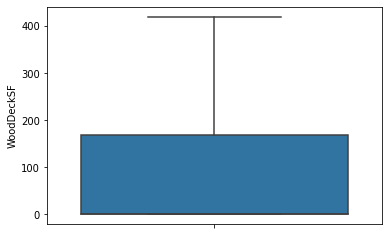

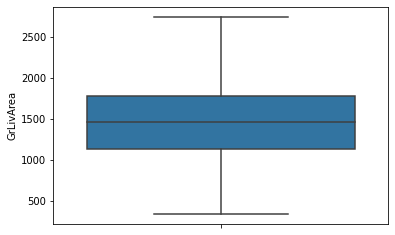

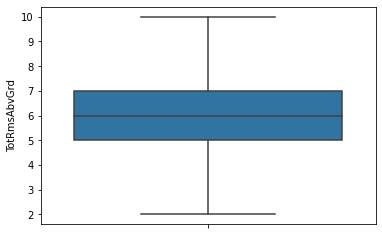

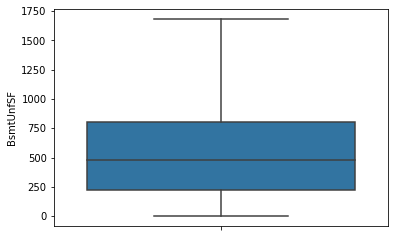

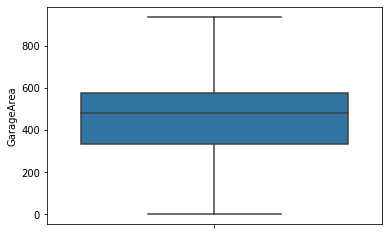

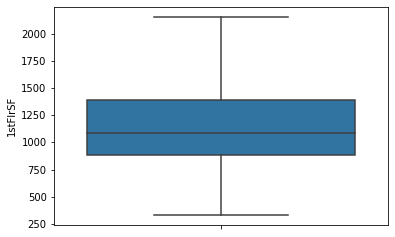

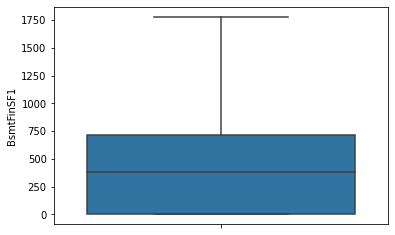

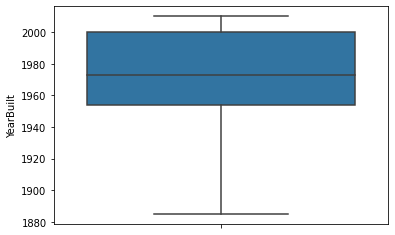

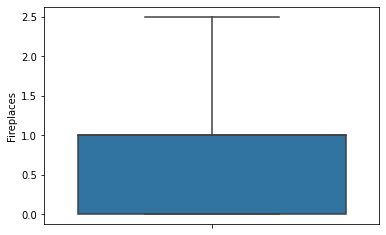

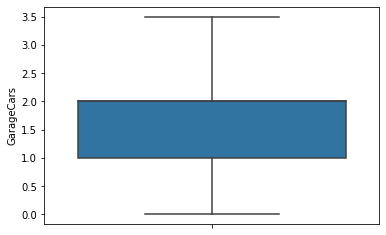

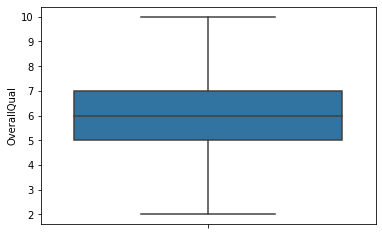

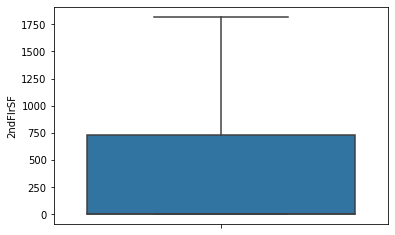

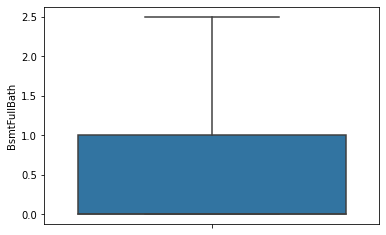

In [0]:
for col in df_num_outliers.Features:
    sns.boxplot(y=df[col])
    plt.show()

**The box plots which was displayed before outlier treatment was compressed, after the outlier treatment we were able to interpret the box-plot better and its not compressed as like before** 

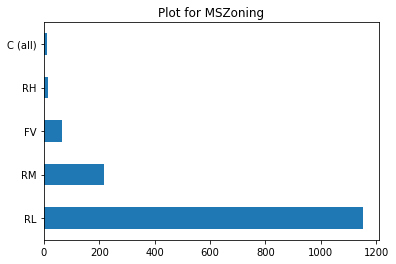

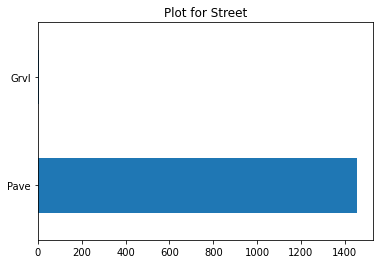

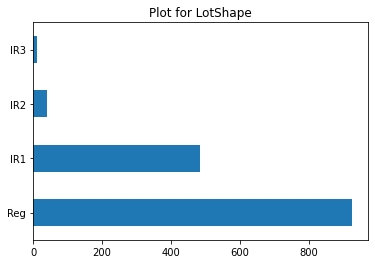

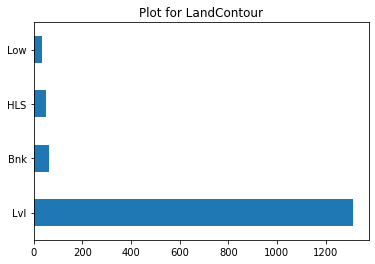

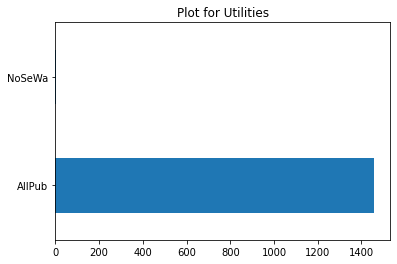

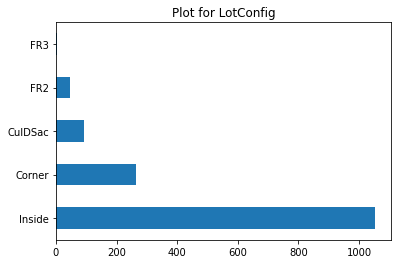

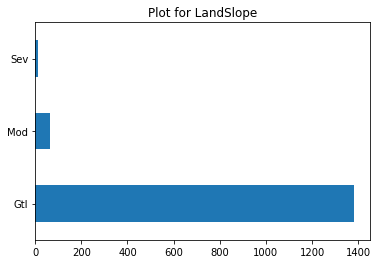

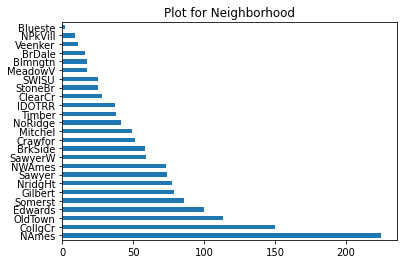

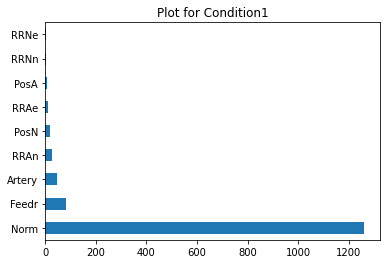

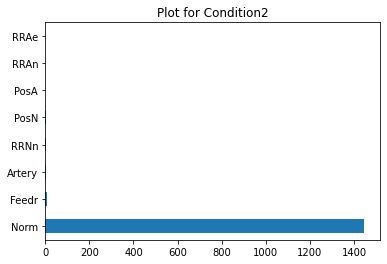

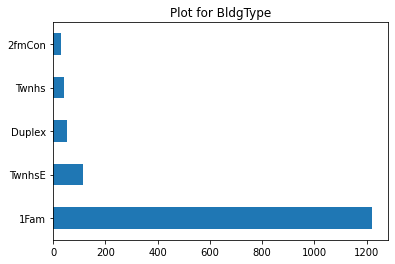

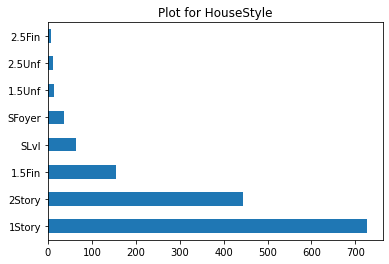

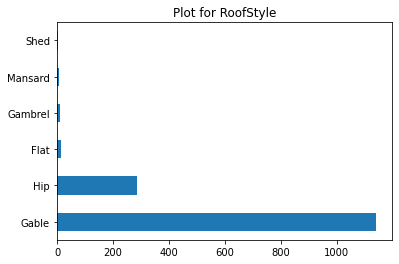

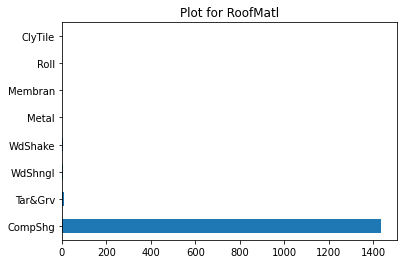

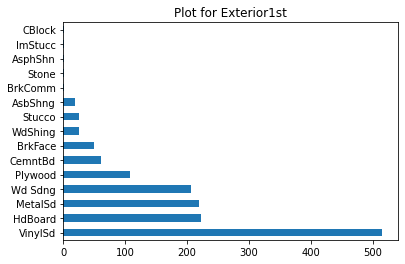

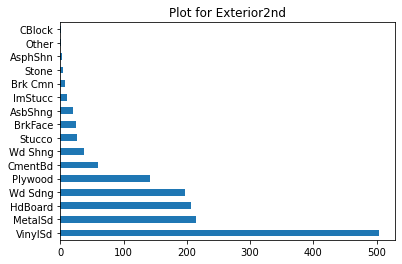

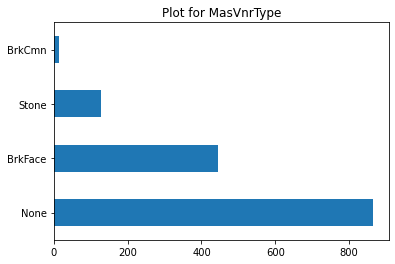

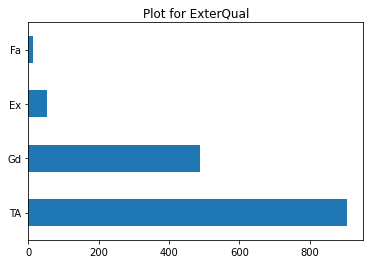

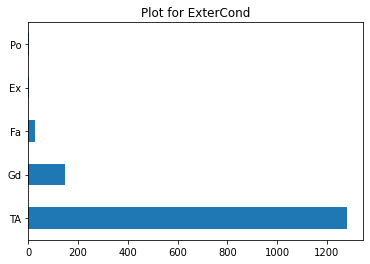

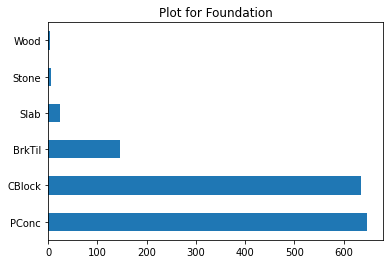

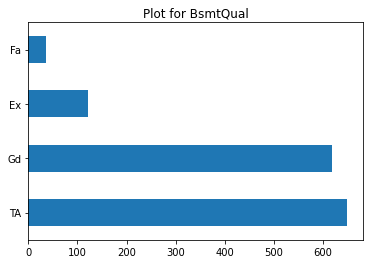

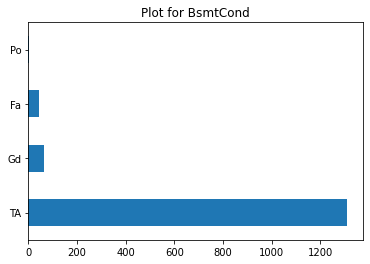

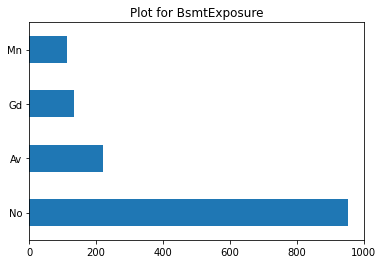

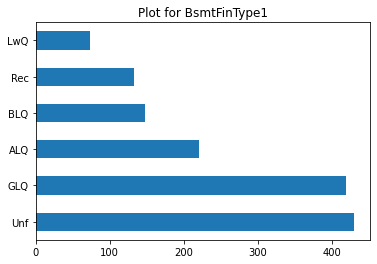

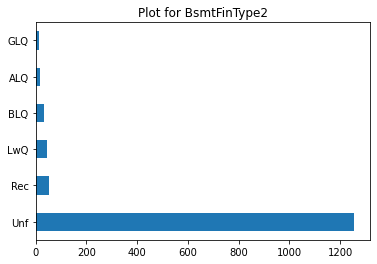

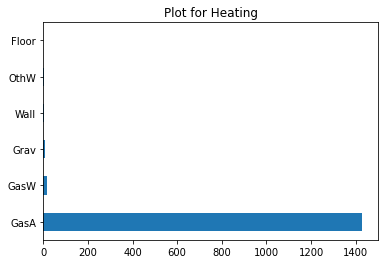

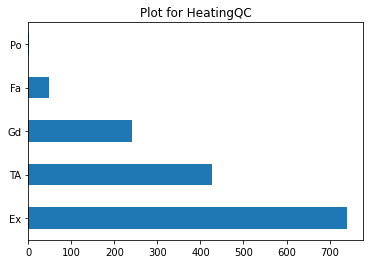

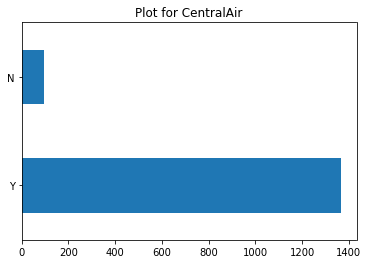

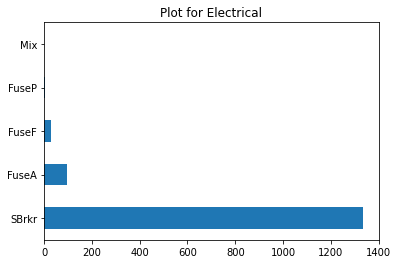

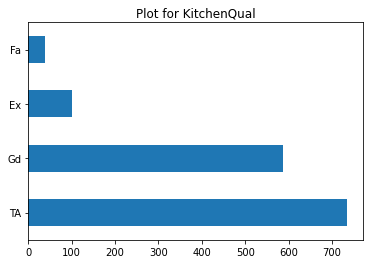

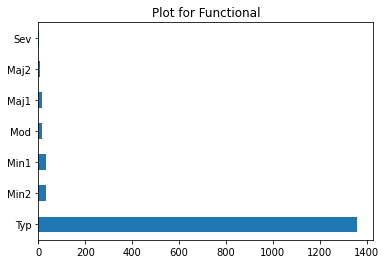

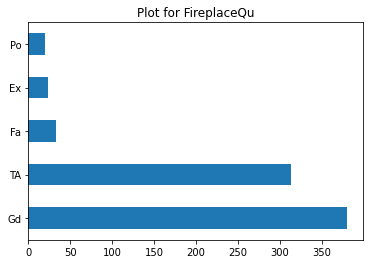

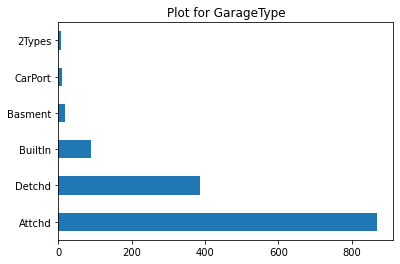

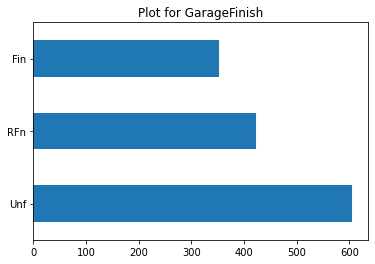

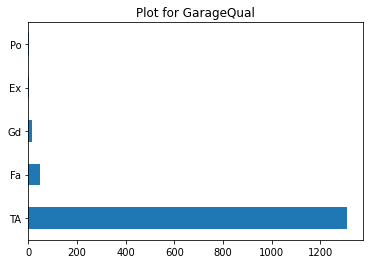

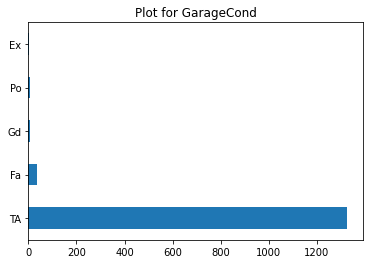

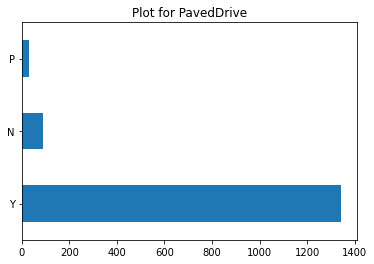

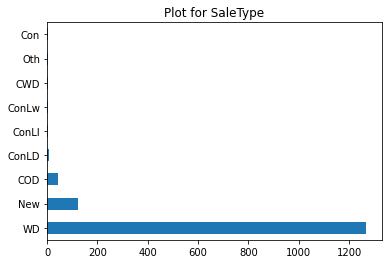

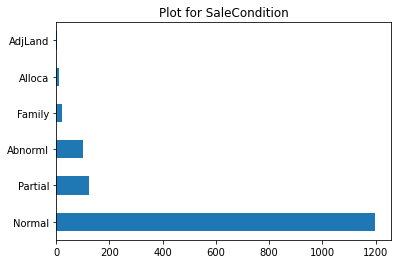

In [0]:
for col in df_categorical_features.columns:
    df[col].value_counts().plot.barh()
    plt.title(f"Plot for {col}")
    plt.show()



In [0]:
df[['Street','Utilities','Condition2','RoofMatl']].describe()

,Street,Utilities,Condition2,RoofMatl
count,1460,1460,1460,1460
unique,2,2,8,8
top,Pave,AllPub,Norm,CompShg
freq,1454,1459,1445,1434


- **The columns 'Street','Utilities','Condition2','RoofMatl' are imbalanced oor heavily skewed on single value which will be dropped**
- **WD is the most observed category in SaleType ,  warranty deed is a document sometimes used in real estate, which offers the buyer of property the greatest amount of insurance, so it makes sense the value is higher**
- **GargageQual has TA as majority, TA stands for average** 
- **We can observe , "Standard Circuit Breakers & Romex" seems to be the prefered Electrical system**



In [0]:
df=df.drop(['Street','Utilities','Condition2','RoofMatl'],axis=1)

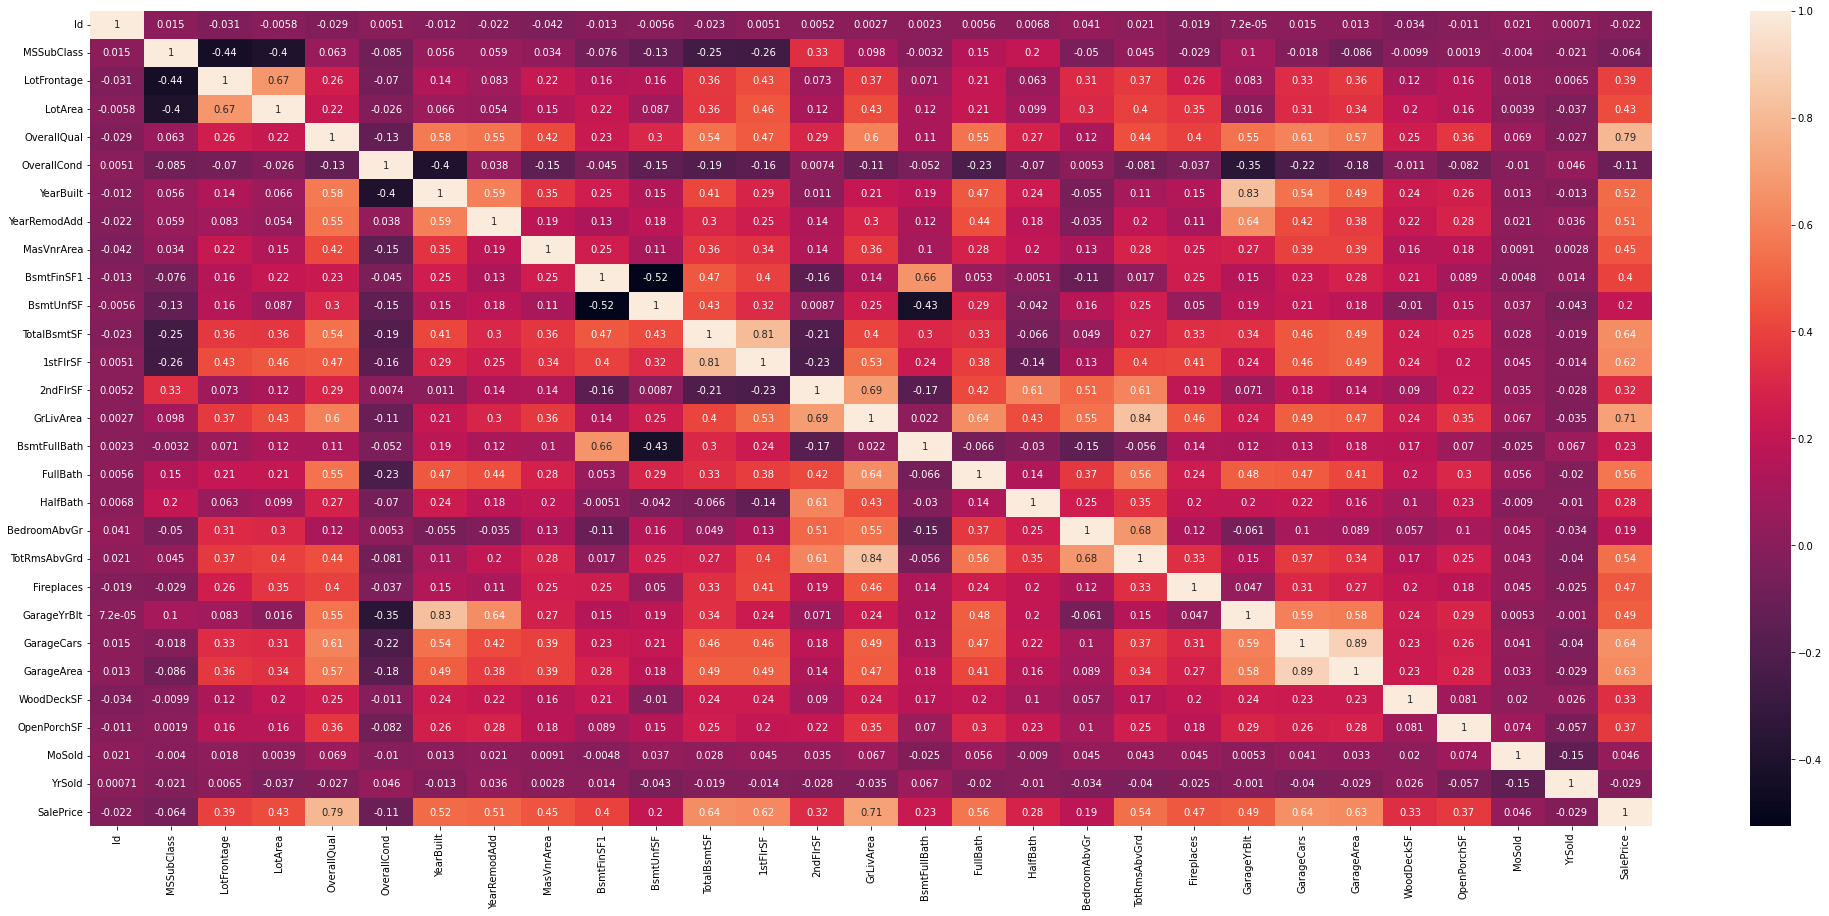

In [0]:
plt.figure(figsize=[35,15])
num_cols = df.select_dtypes(include='number').columns
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

In [0]:
df[num_cols].corr().style.background_gradient(cmap='Blues')


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
Id,1.000000,0.015053,-0.031423,-0.005776,-0.029109,0.005135,-0.012084,-0.021998,-0.042154,-0.013377,-0.005580,-0.023009,0.005143,0.005193,0.002688,0.002282,0.005587,0.006784,0.041480,0.021054,-0.019150,0.000072,0.015140,0.013397,-0.033566,-0.011482,0.021172,0.000712,-0.021917
MSSubClass,0.015053,1.000000,-0.441377,-0.403395,0.062802,-0.085384,0.055790,0.058578,0.034025,-0.076423,-0.132790,-0.251190,-0.259517,0.330582,0.098235,-0.003201,0.150567,0.204110,-0.050319,0.044963,-0.029426,0.103705,-0.017853,-0.085825,-0.009879,0.001883,-0.003956,-0.021216,-0.063602
LotFrontage,-0.031423,-0.441377,1.000000,0.670083,0.259684,-0.069898,0.142101,0.082912,0.224695,0.158175,0.162955,0.364486,0.429996,0.073230,0.374427,0.070517,0.209772,0.062581,0.311664,0.369405,0.256997,0.083236,0.325817,0.364742,0.115632,0.164027,0.017863,0.006466,0.388348
LotArea,-0.005776,-0.403395,0.670083,1.000000,0.221597,-0.026494,0.065765,0.054472,0.145655,0.215825,0.087068,0.361769,0.458118,0.121725,0.433877,0.119690,0.213848,0.099300,0.304671,0.395016,0.352550,0.015895,0.309773,0.344650,0.198311,0.162026,0.003855,-0.036831,0.432216
OverallQual,-0.029109,0.062802,0.259684,0.221597,1.000000,-0.134096,0.575160,0.550829,0.419548,0.229728,0.301697,0.541432,0.473937,0.294860,0.597217,0.112470,0.550501,0.274596,0.116727,0.435768,0.397375,0.547766,0.605169,0.568181,0.246423,0.358426,0.069460,-0.027299,0.791965
OverallCond,0.005135,-0.085384,-0.069898,-0.026494,-0.134096,1.000000,-0.399685,0.038429,-0.153610,-0.045411,-0.148518,-0.191827,-0.156582,0.007366,-0.114282,-0.051877,-0.225769,-0.070449,0.005306,-0.081397,-0.037364,-0.350932,-0.216744,-0.177911,-0.011283,-0.082415,-0.009981,0.046162,-0.106261
YearBuilt,-0.012084,0.055790,0.142101,0.065765,0.575160,-0.399685,1.000000,0.594909,0.350518,0.252815,0.145236,0.410450,0.288418,0.011488,0.214627,0.187540,0.469824,0.242982,-0.055110,0.106356,0.148134,0.826482,0.543050,0.487439,0.238377,0.262130,0.012885,-0.013292,0.524172
YearRemodAdd,-0.021998,0.058578,0.082912,0.054472,0.550829,0.038429,0.594909,1.000000,0.188753,0.126339,0.178277,0.301581,0.246660,0.140013,0.296841,0.119724,0.439046,0.183331,-0.035015,0.196675,0.111881,0.642277,0.423392,0.377331,0.222702,0.280916,0.021490,0.035743,0.507101
MasVnrArea,-0.042154,0.034025,0.224695,0.145655,0.419548,-0.153610,0.350518,0.188753,1.000000,0.251413,0.109348,0.360460,0.341081,0.144518,0.364912,0.100550,0.277593,0.201510,0.126700,0.282587,0.252331,0.273105,0.387685,0.386771,0.161652,0.177151,0.009114,0.002838,0.454371
BsmtFinSF1,-0.013377,-0.076423,0.158175,0.215825,0.229728,-0.045411,0.252815,0.126339,0.251413,1.000000,-0.524935,0.467355,0.395393,-0.157613,0.138405,0.663118,0.052879,-0.005136,-0.111229,0.017366,0.246089,0.151883,0.230993,0.278350,0.209159,0.088830,-0.004769,0.013968,0.400330


- Id column doesnt add any value which will be removed later before Model building
- SalePrice is having correlation (Considering 60% as tolerance) with OverallQual (0.79), TotalBsmtSF(0.64),GrLivArea(0.71),GarageCars(0.64),GarageArea(0.63)
- GarageYrBlt is higly correlated with YrBlt (0.83)
- TotalBsmtSF is higly correlated with 1stFlrSF (0.80)
- TotRmsAbvGrd is highly correlated with GrLivArea (0.84)
- GarageCars is highly correlated with GarageArea
- Its quite clear multicollinearity exists between the predictors

In [0]:
df=df.drop(['Id'],axis=1)

In [0]:
for col in df.select_dtypes('object').columns:
    if df[col].isnull().any():
        print(f"{col} : {round(df[col].isnull().sum()/df.shape[0], 2)*100}%")

MasVnrType : 1.0%
BsmtQual : 3.0%
BsmtCond : 3.0%
BsmtExposure : 3.0%
BsmtFinType1 : 3.0%
BsmtFinType2 : 3.0%
Electrical : 0.0%
FireplaceQu : 47.0%
GarageType : 6.0%
GarageFinish : 6.0%
GarageQual : 6.0%
GarageCond : 6.0%


From the Data dict, it has been observed. We have a special category "NA" as one of the sub-category
Instead of removing these values , we can impute NA-Not Applicable as a replacement for all null values 


In [0]:
df[df.select_dtypes('object').columns] = df[df.select_dtypes('object').columns].fillna(value='NOT APPLICABLE', axis=1)

# Checking after imputation
print(df[df.select_dtypes('object').columns].isnull().sum())

MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64


Derived features 
Age of the Property can be calculated by taking the difference of YrSold & YearBuild

In [0]:

df['age'] = df['YrSold'] - df['YearBuilt']
df.age

Out[117]: 0       5 
1       31
2       7 
3       91
4       8 
       .. 
1455    8 
1456    32
1457    69
1458    60
1459    43
Name: age, Length: 1460, dtype: int64

Dropping YrSold & YearBuilt because Age is derived from the two columns, so we can further use Age as a predictor and this helps to avoid multicollinearity

In [0]:
df=df.drop(['YrSold','YearBuilt'],axis=1)

##Step 4: Encoding Categorical columns 

We have two types of Categorical columns , Ordinal and Unordered categorical columns. So we need to handle the categorical columns in the below way,

We apply One-Hot Encoding when:

- The categorical feature is not ordinal (like the countries above)
- The number of categorical features is less so one-hot encoding can be effectively applied

We apply Label Encoding when:

- The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
- The number of categories is quite large as one-hot encoding can lead to high memory consumption

In [0]:

unordered_cat=['MSZoning','Neighborhood','Condition1','CentralAir','Heating','Electrical','GarageType','PavedDrive','SaleType','LotConfig','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','GarageFinish','SaleCondition']
ordered_cat=['LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageQual','GarageCond']


In [0]:
for col in ordered_cat:
  unique_values = df[col].unique()
  print("Unique values for", col, ":", unique_values)

Unique values for LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
Unique values for LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values for LandSlope : ['Gtl' 'Mod' 'Sev']
Unique values for ExterQual : ['Gd' 'TA' 'Ex' 'Fa']
Unique values for ExterCond : ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Unique values for BsmtQual : ['Gd' 'TA' 'Ex' 'NOT APPLICABLE' 'Fa']
Unique values for BsmtCond : ['TA' 'Gd' 'NOT APPLICABLE' 'Fa' 'Po']
Unique values for BsmtExposure : ['No' 'Gd' 'Mn' 'Av' 'NOT APPLICABLE']
Unique values for BsmtFinType1 : ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NOT APPLICABLE' 'LwQ']
Unique values for BsmtFinType2 : ['Unf' 'BLQ' 'NOT APPLICABLE' 'ALQ' 'Rec' 'LwQ' 'GLQ']
Unique values for HeatingQC : ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Unique values for KitchenQual : ['Gd' 'TA' 'Ex' 'Fa']
Unique values for Functional : ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
Unique values for FireplaceQu : ['NOT APPLICABLE' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Unique values for GarageQual : ['TA' 'Fa' 'Gd' 'NOT APPLICABLE' 'Ex' 'Po']
Uni

Encoding the Ordinal Categorical Columns
For example of Ordinal column is BsmtQual, the categorical classes for BsmtQual are 
      
- Ex	Excellent (100+ inches)	
- Gd	Good (90-99 inches)
- TA	Typical (80-89 inches)
- Fa	Fair (70-79 inches)
- Po	Poor (<70 inches
- NA	No Basement
      
Here we can observe NA being the least and Ex being the highest, so there is a order of ranking observed in the categorical classes       

In [0]:
df['LotShape'] = df['LotShape'].map({'IR3':0,'IR2':1,'IR1':2,'Reg':3})
df['LandContour'] = df['LandContour'].map({'Low':0,'HLS':1,'Bnk':2,'Lvl':3})
df['LandSlope'] = df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond'] = df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df['BsmtQual'].map({'NOT APPLICABLE':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df['BsmtCond'].map({'NOT APPLICABLE':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df['BsmtExposure'].map({'NOT APPLICABLE':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NOT APPLICABLE':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NOT APPLICABLE':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['Functional'] = df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
df['FireplaceQu'] = df['FireplaceQu'].map({'NOT APPLICABLE':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageQual'] = df['GarageQual'].map({'NOT APPLICABLE':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df['GarageCond'].map({'NOT APPLICABLE':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})



In [0]:
df[ordered_cat]

,LotShape,LandContour,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond
0,3,3,0,3,2,4,3,1,6,1,4,3,0,0,3,3
1,3,3,0,2,2,4,3,4,5,1,4,2,0,3,3,3
2,2,3,0,3,2,4,3,2,6,1,4,3,0,3,3,3
3,2,3,0,2,2,3,4,1,5,1,3,3,0,4,3,3
4,2,3,0,3,2,4,3,3,6,1,4,3,0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,3,0,2,2,4,3,1,1,1,4,2,0,3,3,3
1456,3,3,0,2,2,4,3,1,5,3,2,2,1,3,3,3
1457,3,3,0,4,3,3,4,1,6,1,4,3,0,4,3,3
1458,3,3,0,2,2,3,3,2,6,3,3,3,0,0,3,3


Encoding the unordered columns, we would apply getDummies method

In [0]:
df = pd.get_dummies(data=df,columns=unordered_cat,drop_first=True)
df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,...,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NOT APPLICABLE,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageFinish_NOT APPLICABLE,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,7,5.0,2003,196.0,3,2,4,3,1,6,706.0,1,150.0,856,4,856.0,854,1710.0,1.0,2,1,3.0,3,8,0,0.0,0,2003.0,2.0,548.0,3,3,0,61,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600.0,3,3,0,6,7.5,1976,0.0,2,2,4,3,4,5,978.0,1,284.0,1262,4,1262.0,0,1262.0,0.0,2,0,3.0,2,6,0,1.0,3,1976.0,2.0,460.0,3,3,298,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250.0,2,3,0,7,5.0,2002,162.0,3,2,4,3,2,6,486.0,1,434.0,920,4,920.0,866,1786.0,1.0,2,1,3.0,3,6,0,1.0,3,2001.0,2.0,608.0,3,3,0,42,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550.0,2,3,0,7,5.0,1970,0.0,2,2,3,4,1,5,216.0,1,540.0,756,3,961.0,756,1717.0,1.0,1,0,3.0,3,7,0,1.0,4,1998.0,3.0,642.0,3,3,0,35,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260.0,2,3,0,8,5.0,2000,350.0,3,2,4,3,3,6,655.0,1,490.0,1145,4,1145.0,1053,2198.0,1.0,2,1,4.0,3,9,0,1.0,3,2000.0,3.0,836.0,3,3,192,84,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [0]:
df.shape

Out[124]: (1460, 172)

##Step 5: Target variable transformation, Impulation for Missing Numerical Values , Feature Scaling , Feature Selection using RFE

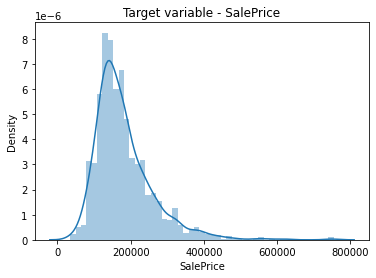

In [0]:
plt.title("Target variable - SalePrice")
sns.distplot(df['SalePrice'])
plt.show()

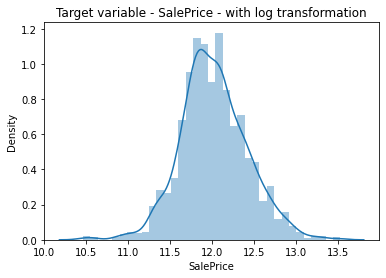

In [0]:
plt.title("Target variable - SalePrice - with log transformation")
sns.distplot(np.log(df['SalePrice']))
plt.show()

The data is skewed , so performed log transformation to bring back the distribution to normal

In [0]:
df.SalePrice=np.log(df.SalePrice)


All the categorical features are ecncoded to Numeric form for Model to understand. However we can observe explosion in the number of features which has to be reduced

In [0]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)

In [0]:
df.isna().sum()

Out[129]: MSSubClass                     0  
LotFrontage                    259
LotArea                        0  
LotShape                       0  
LandContour                    0  
LandSlope                      0  
OverallQual                    0  
OverallCond                    0  
YearRemodAdd                   0  
MasVnrArea                     8  
ExterQual                      0  
ExterCond                      0  
BsmtQual                       0  
BsmtCond                       0  
BsmtExposure                   0  
BsmtFinType1                   0  
BsmtFinSF1                     0  
BsmtFinType2                   0  
BsmtUnfSF                      0  
TotalBsmtSF                    0  
HeatingQC                      0  
1stFlrSF                       0  
2ndFlrSF                       0  
GrLivArea                      0  
BsmtFullBath                   0  
FullBath                       0  
HalfBath                       0  
BedroomAbvGr                   0  
KitchenQua

There are still few missing values in the numerical features - LotFrontage & GarageYrBlt , lets hand this by applying MICE

**However before immputation and scaling, the best practice is to split the dataset into train and Split to avoild the Data leakage**

In [0]:
training_dataset, test_dataset = train_test_split(df, train_size=0.75)


In [0]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##Applying MICE 

**Treating missing values with mean, median and mode can caused bias in the dataset ,one of the most popuular systematic way to handle the missing data is MICE**

**MICE Imputation, short for ‘Multiple Imputation by Chained Equation’ is an advanced missing data imputation technique that uses multiple iterations of Machine Learning model training to predict the missing values using known values from other features in the data as predictors.**

Here is a quick intuition (not the exact algorithm)

1. You basically take the variable that contains missing values as a response ‘Y’ and other variables as predictors ‘X’.

2. Build a model with rows where Y is not missing.

3. Then predict the missing observations.

In [0]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=100)
imp.fit(training_dataset[['LotFrontage','GarageYrBlt','MasVnrArea']])

[IterativeImputer] Completing matrix with shape (1095, 3)
[IterativeImputer] Ending imputation round 1/10, elapsed time 8.06
[IterativeImputer] Change: 100.82129713728828, scaled tolerance: 2.0100000000000002 
[IterativeImputer] Ending imputation round 2/10, elapsed time 15.57
[IterativeImputer] Change: 3.0356913160275525, scaled tolerance: 2.0100000000000002 
[IterativeImputer] Ending imputation round 3/10, elapsed time 23.17
[IterativeImputer] Change: 0.1457393314730382, scaled tolerance: 2.0100000000000002 
[IterativeImputer] Early stopping criterion reached.
Out[132]: IterativeImputer(estimator=LinearRegression(), imputation_order='roman',
                 random_state=100, verbose=2)

In [0]:
training_dataset[['LotFrontage','GarageYrBlt','MasVnrArea']] = imp.transform(training_dataset[['LotFrontage','GarageYrBlt','MasVnrArea']])
test_dataset[['LotFrontage','GarageYrBlt','MasVnrArea']] = imp.transform(test_dataset[['LotFrontage','GarageYrBlt','MasVnrArea']])

[IterativeImputer] Completing matrix with shape (1095, 3)
[IterativeImputer] Ending imputation round 1/3, elapsed time 0.02
[IterativeImputer] Ending imputation round 2/3, elapsed time 0.04
[IterativeImputer] Ending imputation round 3/3, elapsed time 0.06
[IterativeImputer] Completing matrix with shape (365, 3)
[IterativeImputer] Ending imputation round 1/3, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/3, elapsed time 0.02
[IterativeImputer] Ending imputation round 3/3, elapsed time 0.03


In [0]:
training_dataset[['LotFrontage','GarageYrBlt','MasVnrArea']].isna().sum()

Out[134]: LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64

In [0]:
test_dataset[['LotFrontage','GarageYrBlt','MasVnrArea']].isna().sum()

Out[135]: LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64

**Feature Scaling**
 is performed after train/test split to avoid the Data leakage 

In [0]:

scaling = MinMaxScaler()
scaling.fit(training_dataset)



Out[136]: MinMaxScaler()

In [0]:
training_dataset_scaled = pd.DataFrame(data=scaling.transform(training_dataset), columns=training_dataset.columns)
test_dataset_scaled = pd.DataFrame(data=scaling.transform(test_dataset), columns=test_dataset.columns)

In [0]:
training_dataset_scaled.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,...,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NOT APPLICABLE,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageFinish_NOT APPLICABLE,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,...,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,0.274411,0.498459,0.503077,0.864536,0.938813,0.027854,0.514612,0.509817,0.583135,0.223513,0.468493,0.521233,0.700457,0.734018,0.405708,0.589650,0.244913,0.208371,0.338478,0.502827,0.791096,0.454422,0.189338,0.486084,0.167489,0.523896,0.191781,0.587443,0.504414,0.562329,0.027093,0.245845,0.364749,0.715240,0.509589,0.507714,0.565114,0.565479,0.216404,0.251453,...,0.000913,0.150685,0.067580,0.001826,0.013699,0.364384,0.138813,0.020091,0.002740,0.005479,0.019178,0.000913,0.040183,0.132420,0.007306,0.147945,0.000913,0.094977,0.003653,0.016438,0.357078,0.128767,0.026484,0.314155,0.007306,0.581735,0.085845,0.432877,0.447489,0.015525,0.003653,0.002740,0.051142,0.296804,0.401826,0.003653,0.006393,0.010959,0.819178,0.092237
std,0.298039,0.211124,0.221865,0.194416,0.202087,0.131440,0.173722,0.241493,0.346537,0.327052,0.194367,0.088502,0.176472,0.140498,0.266077,0.351218,0.244334,0.152792,0.259580,0.199029,0.239783,0.198761,0.240643,0.199265,0.204614,0.183108,0.249728,0.190472,0.222070,0.192323,0.115023,0.255074,0.360326,0.217384,0.210301,0.217831,0.139689,0.138993,0.274235,0.310622,...,0.030220,0.357905,0.251138,0.042718,0.116290,0.481477,0.345909,0.140377,0.052295,0.073854,0.137213,0.030220,0.196477,0.339102,0.085201,0.355208,0.030220,0.293317,0.060357,0.127212,0.479357,0.335095,0.160643,0.464391,0.085201,0.493500,0.280263,0.495700,0.497462,0.123685,0.060357,0.052295,0.220387,0.457058,0.490491,0.060357,0.079735,0.104157,0.385046,0.289493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

##Step 3: Identifying Nonlinearity in Data


In [0]:
X_train_scaled=training_dataset_scaled.drop(['SalePrice'],axis=1)
y_train_scaled=training_dataset_scaled.pop('SalePrice')

X_test_scaled=test_dataset_scaled.drop(['SalePrice'],axis=1)
y_test_scaled=test_dataset_scaled.pop('SalePrice')

In [0]:
print(X_train_scaled.shape)
print(y_train_scaled.shape)
print(X_test_scaled.shape)
print(y_test_scaled.shape)

(1095, 171)
(1095,)
(365, 171)
(365,)


In [0]:

def topNfeatures(n):
    """
    Function takes integer value n, where n is the number of features selected by RFE
    returns train set which has RFE selected features as dataframe
    """ 
    lm = LinearRegression()
    lm.fit(X_train_scaled, y_train_scaled)
    # running RFE for top N features
    rfe = RFE(lm, n)            
    rfe = rfe.fit(X_train_scaled, y_train_scaled)
    # Check the ranks
    list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
    features = X_train_scaled.columns[rfe.support_]
    print('************RFE Selected Features are****************')
    print(f"Total number of features selected by RFE is {str(len(features))}") 
    print(features)
    X_train_rfe=pd.DataFrame(X_train_scaled[features])
    return X_train_rfe


def buildlinear_reg(X_train,y_train):
    """
    Building linear regressio model using stats model api & also prints the stats model summary 
 
    Args:
        a (list of string): The list of features 
        
    Returns:
        linear model 
    """

    X_train_sm = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())

    ###Calclating VIF
    #check VIF of RFE Model
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF',ascending=False)
    print(vif)

    return lm    

In [0]:
X_train_rfe=topNfeatures(60)

[('MSSubClass', False, 37), ('LotFrontage', False, 99), ('LotArea', True, 1), ('LotShape', False, 44), ('LandContour', False, 64), ('LandSlope', False, 20), ('OverallQual', True, 1), ('OverallCond', True, 1), ('YearRemodAdd', False, 57), ('MasVnrArea', False, 45), ('ExterQual', False, 55), ('ExterCond', False, 101), ('BsmtQual', False, 18), ('BsmtCond', False, 84), ('BsmtExposure', False, 19), ('BsmtFinType1', False, 61), ('BsmtFinSF1', False, 60), ('BsmtFinType2', False, 36), ('BsmtUnfSF', True, 1), ('TotalBsmtSF', True, 1), ('HeatingQC', False, 23), ('1stFlrSF', False, 5), ('2ndFlrSF', True, 1), ('GrLivArea', True, 1), ('BsmtFullBath', False, 27), ('FullBath', False, 29), ('HalfBath', False, 28), ('BedroomAbvGr', False, 97), ('KitchenQual', True, 1), ('TotRmsAbvGrd', False, 33), ('Functional', True, 1), ('Fireplaces', False, 13), ('FireplaceQu', False, 107), ('GarageYrBlt', False, 3), ('GarageCars', True, 1), ('GarageArea', False, 95), ('GarageQual', True, 1), ('GarageCond', False, 2

In [0]:
buildlinear_reg(X_train_rfe,y_train_scaled)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     215.6
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:48:26   Log-Likelihood:                 2083.6
No. Observations:                1095   AIC:                            -4049.
Df Residuals:                    1036   BIC:                            -3754.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

- R2 - the independent variables explain 92.4% of the variation in the target
- P>|t| is more than significance level(0.05) for many columns which is not good
- Many Variables have extremly high VIF which means there is a high Multicollinearity exists
- Lets trim the features down to 45

In [0]:
X_train_rfe=topNfeatures(45)


************RFE Selected Features are****************
Total number of features selected by RFE is 45
Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'KitchenQual', 'Functional', 'GarageCars', 'GarageQual',
       'age', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'Condition1_RRAn', 'Condition1_RRNn', 'Heating_Grav', 'Heating_OthW',
       'Heating_Wall', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NOT APPLICABLE', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_New', 'BldgType_Duplex', 'RoofStyle_Shed',
       'Exterior1st_BrkComm', 'Foundation_Wood', 'GarageFinish_NOT APPLICABLE',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Normal'

In [0]:
buildlinear_reg(X_train_rfe,y_train_scaled)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     265.8
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:59:20   Log-Likelihood:                 2043.0
No. Observations:                1095   AIC:                            -3996.
Df Residuals:                    1050   BIC:                            -3771.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

- R2 - the independent variables explain 91.8% of the variation in the target
- P>|t| is more than significance level(0.05) for many columns which is not good
- Many Variables have extremly high VIF which means there is a high Multicollinearity exists
- Lets trim the features down to 30

In [0]:
X_train_rfe=topNfeatures(30)


************RFE Selected Features are****************
Total number of features selected by RFE is 30
Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'KitchenQual', 'Functional', 'GarageCars', 'GarageQual',
       'age', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Heating_Grav', 'Heating_OthW', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageType_NOT APPLICABLE', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_New', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Foundation_Wood', 'GarageFinish_NOT APPLICABLE',
       'SaleCondition_Partial'],
      dtype='object')


In [0]:
buildlinear_reg(X_train_rfe,y_train_scaled)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     343.2
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:10:00   Log-Likelihood:                 1955.4
No. Observations:                1095   AIC:                            -3851.
Df Residuals:                    1065   BIC:                            -3701.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

- R2 value is slightly dropped 
-  P>|t| value is almost controlled , except for two varibles
- VIF is high for many variables
- Lets reduce the number of feature selection with the factor of 5 , lets do feature selection with 25 as RFE value


In [0]:
X_train_rfe=topNfeatures(25)


************RFE Selected Features are****************
Total number of features selected by RFE is 25
Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'KitchenQual', 'Functional', 'GarageCars', 'GarageQual',
       'age', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Heating_Grav', 'Heating_OthW', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_New', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Foundation_Wood', 'GarageFinish_NOT APPLICABLE',
       'SaleCondition_Partial'],
      dtype='object')


In [0]:
lr=buildlinear_reg(X_train_rfe,y_train_scaled)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     396.3
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:22:53   Log-Likelihood:                 1951.4
No. Observations:                1095   AIC:                            -3851.
Df Residuals:                    1069   BIC:                            -3721.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

- R2 value is slightly dropped 
-  P>|t| value is almost controlled , except for two varibles
- VIF is high for many variables
- Lets reduce the number of feature selection with the factor of 5 , lets do feature selection with 20 as RFE value


In [0]:
X_train_rfe=topNfeatures(20)


************RFE Selected Features are****************
Total number of features selected by RFE is 20
Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'Functional', 'GarageCars', 'age', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Heating_Grav',
       'SaleType_CWD', 'SaleType_New', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Foundation_Wood', 'SaleCondition_Partial'],
      dtype='object')


In [0]:
lr=buildlinear_reg(X_train_rfe,y_train_scaled)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     475.3
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:39:35   Log-Likelihood:                 1928.7
No. Observations:                1095   AIC:                            -3815.
Df Residuals:                    1074   BIC:                            -3710.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.03

Lets use 25 variables as final , because we witnessed reducing features further reducing the R2 sccore less than 90%
When we are building Lasso and Ridge , we would be able to find the best model by minimizing the beta values of the variables

In [0]:
X_train_rfe=topNfeatures(25)


************RFE Selected Features are****************
Total number of features selected by RFE is 25
Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'KitchenQual', 'Functional', 'GarageCars', 'GarageQual',
       'age', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Heating_Grav', 'Heating_OthW', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_New', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Foundation_Wood', 'GarageFinish_NOT APPLICABLE',
       'SaleCondition_Partial'],
      dtype='object')


In [0]:
lm = LinearRegression()
lm.fit(X_train_rfe, y_train_scaled)
# predict
y_train_pred = lm.predict(X_train_rfe)
print(f"R2 score for train {r2_score(y_true=y_train_scaled, y_pred=y_train_pred)}")

y_test_pred = lm.predict(X_test_scaled[X_train_rfe.columns])
r2_score(y_true=y_test_scaled, y_pred=y_test_pred)
print(f"R2 score for test {r2_score(y_true=y_test_scaled, y_pred=y_test_pred)}")


R2 score for train 0.9026077373670004
R2 score for test 0.8578493522487718


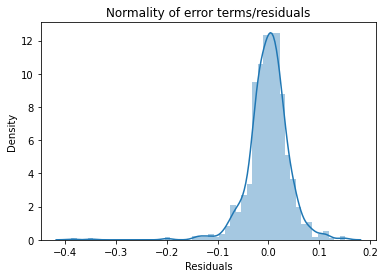

In [0]:
# Distribution of errors
y_res=y_train_scaled - y_train_pred
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

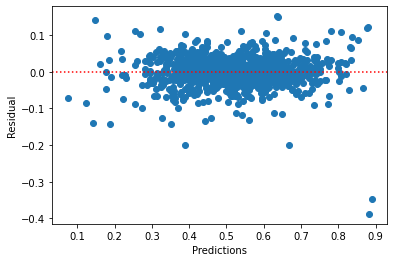

In [0]:

plt.scatter( y_train_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

- We Observe 5% variance between Train and test R2 score 
- **Lets further build models using Regularization. Regularization helps with managing model complexity by essentially shrinking the model coefficient estimates towards 0. This discourages the model from becoming too complex, thus avoiding the risk of overfitting**

## Lasso

In [0]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [0]:
X_test=X_test_scaled[X_train_rfe.columns]

In [0]:


estimator_model = Lasso()
cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
cv.fit(X_train_rfe, y_train_scaled)
alpha = cv.best_params_["alpha"]
print(f"Lasso Optimum alpha valaue is {alpha}")
final_model_lasso = cv.best_estimator_

final_model_lasso.fit(X_train_rfe, y_train_scaled)
y_train_pred = final_model_lasso.predict(X_train_rfe)
y_test_pred = final_model_lasso.predict(X_test)

# Scores

print('R2 score (train) : ',r2_score(y_train_scaled,y_train_pred))
print('R2 score (test) : ',r2_score(y_test_scaled,y_test_pred))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train_scaled, y_train_pred)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test_scaled, y_test_pred)))



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Lasso Optimum alpha valaue is 0.0001
R2 score (train) :  0.8976874833007825
R2 score (test) :  0.8902879288095186
RMSE (train) :  0.04173655752026662
RMSE (test) :  0.04239256606635731


**Its evident both train and test R2 value yields 89% , unlike linear regression which had 5 % variance , with the alpha value of 0.001, the lasso model has regulaized output**

## Ridge

In [0]:


estimator_model = Ridge()
cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
cv.fit(X_train_rfe, y_train_scaled)
alpha = cv.best_params_["alpha"]
print(f"Ridge Optimum alpha valaue is {alpha}")
final_model_ridge = cv.best_estimator_

final_model_ridge.fit(X_train_rfe, y_train_scaled)
y_train_pred = final_model_ridge.predict(X_train_rfe)
y_test_pred = final_model_ridge.predict(X_test)

# Scores

print('R2 score (train) : ',r2_score(y_train_scaled,y_train_pred))
print('R2 score (test) : ',r2_score(y_test_scaled,y_test_pred))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train_scaled, y_train_pred)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test_scaled, y_test_pred)))



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Ridge Optimum alpha valaue is 0.8
R2 score (train) :  0.9012739731508796
R2 score (test) :  0.876854312467977
RMSE (train) :  0.04099850976409493
RMSE (test) :  0.044913003878896365


**Ridge definitely did better than linear regression model which had 5% variance between train and test R2 score.**

In [0]:
model_coefficients = pd.DataFrame(index=X_train_rfe.columns)
model_coefficients.rows = X_train_rfe.columns

model_coefficients['Ridge (alpha=0.8)'] = final_model_ridge.coef_
model_coefficients['Lasso (alpha=0.0001)'] = final_model_lasso.coef_
model_coefficients

,Ridge (alpha=0.8),Lasso (alpha=0.0001)
LotArea,0.056188,0.052651
OverallQual,0.175620,0.182985
OverallCond,0.074337,0.075761
BsmtUnfSF,-0.051175,-0.050633
TotalBsmtSF,0.138792,0.138790
GrLivArea,0.226425,0.226416
KitchenQual,0.049005,0.045924
Functional,-0.068311,-0.062300
GarageCars,0.072312,0.069452
GarageQual,0.044656,0.005655


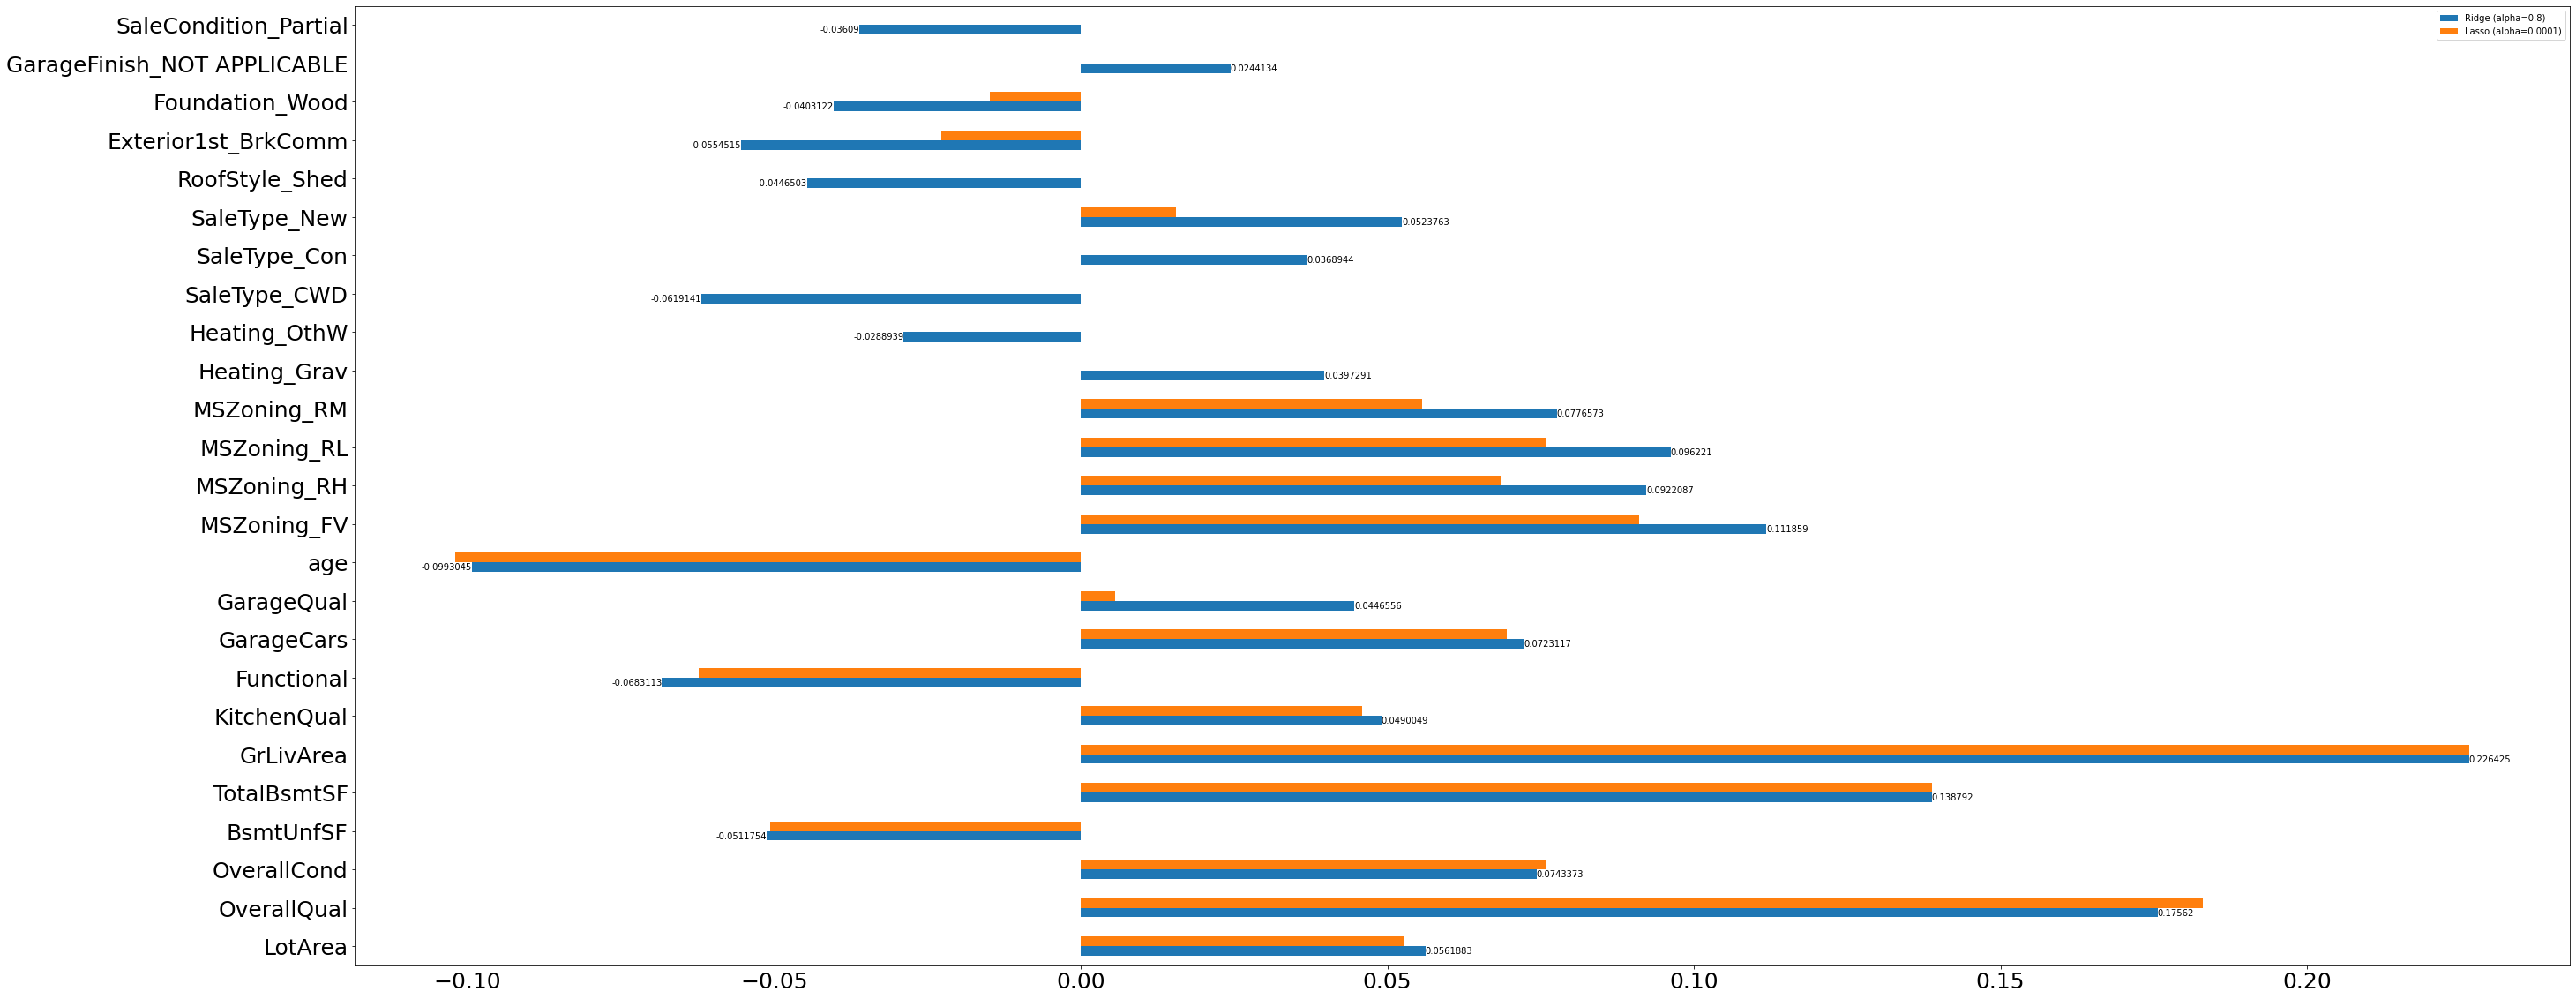

In [0]:
ax=model_coefficients.plot.barh(figsize=(45, 20),fontsize=25)
ax.bar_label(ax.containers[0])

plt.show()



In [0]:
model_coefficients[model_coefficients['Lasso (alpha=0.0001)']==0][['Lasso (alpha=0.0001)']]

,Lasso (alpha=0.0001)
Heating_Grav,0.0
Heating_OthW,0.0
SaleType_CWD,0.0
SaleType_Con,0.0
RoofStyle_Shed,0.0
GarageFinish_NOT APPLICABLE,0.0
SaleCondition_Partial,0.0


#Summary
- ##Lasso Performed better than Ridge and Linear Regression
- ###Lasso prediction score on train(0.897) and test(0.890) is close to zero variance(0.007)
- ###Ridge prediction score on train(0.901) and test(0.876) is close to 3% variance
- ###Linear regression prediction score on train(0.902) and test(0.857) is close to 5% variance
- ### RMSE value of Prediction on test is slightly lesser for lasso compared to Ridge , smaller the better. So Lasso wins even with RMSE
- ####In Lasso, some of these coefficients become 0(check the table above), thus resulting in model selection and, hence, easier interpretation
- ####In Lasso the features which influences the model are displayed in the below table
- ####The optimized alpha value of Lasso is 0.0001 and Ridge is 0.8


In [0]:
model_coefficients[model_coefficients['Lasso (alpha=0.0001)']!=0][['Lasso (alpha=0.0001)']]

,Lasso (alpha=0.0001)
LotArea,0.052651
OverallQual,0.182985
OverallCond,0.075761
BsmtUnfSF,-0.050633
TotalBsmtSF,0.138790
GrLivArea,0.226416
KitchenQual,0.045924
Functional,-0.062300
GarageCars,0.069452
GarageQual,0.005655


#Subjective Questions

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [0]:


ridge = Ridge(alpha=1.6) # 0.8 * 2 = 1.6           
ridge.fit(X_train_rfe, y_train_scaled)

y_train_pred = ridge.predict(X_train_rfe)
y_test_pred = ridge.predict(X_test)

# Scores

print('R2 score (train) : ',r2_score(y_train_scaled,y_train_pred))
print('R2 score (test) : ',r2_score(y_test_scaled,y_test_pred))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train_scaled, y_train_pred)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test_scaled, y_test_pred)))



R2 score (train) :  0.899542788569235
R2 score (test) :  0.8819672914311996
RMSE (train) :  0.04135640698456591
RMSE (test) :  0.04397073096310872


In [0]:


lasso = Lasso(alpha=0.0002) # 0.0001 * 2 = 0.0002           
lasso.fit(X_train_rfe, y_train_scaled)

y_train_pred = lasso.predict(X_train_rfe)
y_test_pred = lasso.predict(X_test)

# Scores

print('R2 score (train) : ',r2_score(y_train_scaled,y_train_pred))
print('R2 score (test) : ',r2_score(y_test_scaled,y_test_pred))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train_scaled, y_train_pred)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test_scaled, y_test_pred)))



R2 score (train) :  0.8927921224213486
R2 score (test) :  0.888650110484395
RMSE (train) :  0.04272337866482642
RMSE (test) :  0.042707819044503624


In [0]:
model_coef_1 = pd.DataFrame(index=X_train_rfe.columns)
model_coef_1.rows = X_train_rfe.columns

model_coef_1['Ridge (alpha=1.6)'] = ridge.coef_
model_coef_1['Lasso (alpha=0.0002)'] = lasso.coef_
model_coef_1

,Ridge (alpha=1.6),Lasso (alpha=0.0002)
LotArea,0.056401,0.049616
OverallQual,0.174458,0.187642
OverallCond,0.074215,0.077752
BsmtUnfSF,-0.049158,-0.047578
TotalBsmtSF,0.135842,0.135337
GrLivArea,0.221255,0.224467
KitchenQual,0.051462,0.045449
Functional,-0.063487,-0.052571
GarageCars,0.073071,0.069602
GarageQual,0.035141,0.001920


In [0]:
model_coef_1[model_coef_1['Lasso (alpha=0.0002)']==0][['Lasso (alpha=0.0002)']]

,Lasso (alpha=0.0002)
MSZoning_RM,0.0
Heating_Grav,0.0
Heating_OthW,-0.0
SaleType_CWD,-0.0
SaleType_Con,0.0
RoofStyle_Shed,-0.0
Exterior1st_BrkComm,-0.0
Foundation_Wood,-0.0
GarageFinish_NOT APPLICABLE,-0.0
SaleCondition_Partial,0.0


In [0]:
model_coef_1[model_coef_1['Lasso (alpha=0.0002)']!=0][['Lasso (alpha=0.0002)']].sort_values(by='Lasso (alpha=0.0002)', ascending=False)

,Lasso (alpha=0.0002)
GrLivArea,0.224467
OverallQual,0.187642
TotalBsmtSF,0.135337
OverallCond,0.077752
GarageCars,0.069602
LotArea,0.049616
KitchenQual,0.045449
MSZoning_FV,0.033596
MSZoning_RL,0.021558
SaleType_New,0.014374


In [0]:
model_coef_1[['Ridge (alpha=1.6)']].sort_values(by='Ridge (alpha=1.6)', ascending=False)

,Ridge (alpha=1.6)
GrLivArea,0.221255
OverallQual,0.174458
TotalBsmtSF,0.135842
MSZoning_FV,0.090149
MSZoning_RL,0.075796
OverallCond,0.074215
GarageCars,0.073071
MSZoning_RH,0.068992
MSZoning_RM,0.056515
LotArea,0.056401


Question - After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [0]:
model_coefficients[model_coefficients['Lasso (alpha=0.0001)']!=0][['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False)

,Lasso (alpha=0.0001)
GrLivArea,0.226416
OverallQual,0.182985
TotalBsmtSF,0.138790
MSZoning_FV,0.091124
MSZoning_RL,0.075947
OverallCond,0.075761
GarageCars,0.069452
MSZoning_RH,0.068488
MSZoning_RM,0.055677
LotArea,0.052651


In [0]:
dropList=['GrLivArea','OverallQual','TotalBsmtSF','MSZoning_FV','MSZoning_RL']

In [0]:

X_train_rfe=X_train_rfe.drop(dropList,axis=1)
X_test=X_test.drop(dropList,axis=1)
estimator_model = Lasso()
cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
cv.fit(X_train_rfe, y_train_scaled)
alpha = cv.best_params_["alpha"]
print(f"Lasso Optimum alpha valaue is {alpha}")
final_model_lasso = cv.best_estimator_

final_model_lasso.fit(X_train_rfe, y_train_scaled)
y_train_pred = final_model_lasso.predict(X_train_rfe)
y_test_pred = final_model_lasso.predict(X_test)

# Scores

print('R2 score (train) : ',r2_score(y_train_scaled,y_train_pred))
print('R2 score (test) : ',r2_score(y_test_scaled,y_test_pred))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train_scaled, y_train_pred)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test_scaled, y_test_pred)))



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Lasso Optimum alpha valaue is 0.001
R2 score (train) :  0.7056979294448806
R2 score (test) :  0.702067181477535
RMSE (train) :  0.07078624909998796
RMSE (test) :  0.06985888847303616


In [0]:
model_coef_2 = pd.DataFrame(index=X_train_rfe.columns)
model_coef_2.rows = X_train_rfe.columns
model_coef_2['Lasso (alpha=0.001)'] = final_model_lasso.coef_
model_coef_2[model_coef_2['Lasso (alpha=0.001)']!=0][['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

,Lasso (alpha=0.001)
GarageCars,0.177129
KitchenQual,0.175559
LotArea,0.146529
OverallCond,0.051638
SaleType_New,0.012155
BsmtUnfSF,0.005393
MSZoning_RM,-0.006341
age,-0.133569
